In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Chemin vers le répertoire des données d'entraînement
data_dir = r'C:\Users\33658\Downloads\DataSet\test'

# Initialisation du générateur d'images
datagen = ImageDataGenerator(rescale=1./255)

# Générateur pour lire les données du répertoire
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),  # Taille des images
    batch_size=32,
    class_mode='categorical'  # Classification multiclasse
)

# Récupérer et afficher les classes
class_indices = train_generator.class_indices
print("Classes détectées :")
for class_name, class_id in class_indices.items():
    print(f"{class_name}: {class_id}")


Found 700 images belonging to 6 classes.
Classes détectées :
Robert Downey Jr: 0
Sandra Bullock: 1
Scarlett Johansson: 2
Tom Cruise: 3
Tom Hanks: 4
Will Smith: 5


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Initialisation du générateur d'images avec augmentation des données
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalisation
    rotation_range=20,  # Rotation
    width_shift_range=0.2,  # Décalage horizontal
    height_shift_range=0.2,  # Décalage vertical
    shear_range=0.2,  # Cisaillement
    zoom_range=0.2,  # Zoom
    horizontal_flip=True,  # Flip horizontal
    validation_split=0.2  # Fraction pour la validation
)

# Générateurs pour l'entraînement et la validation
train_generator = datagen.flow_from_directory(
    r'C:\Users\33658\Downloads\DataSet\test',
    target_size=(224, 224),  # Dimension des images
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    r'C:\Users\33658\Downloads\DataSet\test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 560 images belonging to 6 classes.
Found 140 images belonging to 6 classes.


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Définir un modèle amélioré
model = Sequential()

# Bloc 1 : Convolution + BatchNormalization + Pooling
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bloc 2 : Convolution + BatchNormalization + Pooling
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bloc 3 : Convolution + BatchNormalization + Pooling
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Bloc 4 : Convolution + BatchNormalization + Pooling
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Couches Fully Connected
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Régularisation pour éviter le surapprentissage
model.add(Dense(len(train_generator.class_indices), activation='softmax'))  # Couche de sortie

# Compiler le modèle
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Afficher le résumé du modèle
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,237,190 (50.50 MB)

 Trainable params: 13,236,230 (50.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [64]:
from tensorflow.keras.callbacks import EarlyStopping

# Callback pour éviter le surapprentissage
early_stop = EarlyStopping(
    monitor='val_loss', 
    patience=5, 
    restore_best_weights=True
)

# Entraînement du modèle
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,  # Nombre d'époques à ajuster
    callbacks=[early_stop]
)


Epoch 1/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.2519 - loss: 15.8038 - val_accuracy: 0.2857 - val_loss: 3.2503
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2892 - loss: 11.7127 - val_accuracy: 0.1429 - val_loss: 3.4731
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.2603 - loss: 3.7826 - val_accuracy: 0.1643 - val_loss: 3.6499
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.2850 - loss: 2.0589 - val_accuracy: 0.1571 - val_loss: 4.3329
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.2792 - loss: 1.8855 - val_accuracy: 0.2857 - val_loss: 5.8961
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3300 - loss: 1.8092 - val_accuracy: 0.2857 - val_loss: 8.1247


In [56]:
print(f"Nombre d'images pour l'entraînement : {train_generator.samples}")
print(f"Nombre d'images pour la validation : {val_generator.samples}")
print(model.metrics_names)


Nombre d'images pour l'entraînement : 219
Nombre d'images pour la validation : 51
['loss', 'compile_metrics']


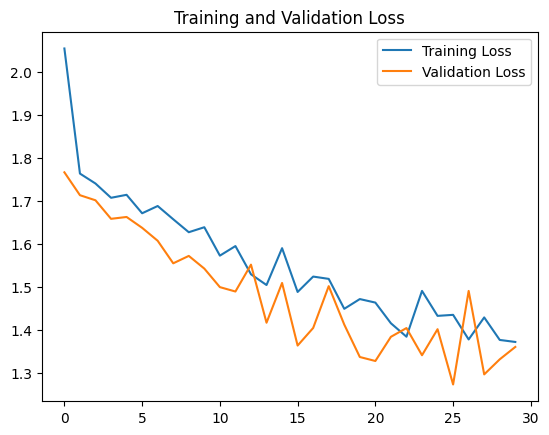

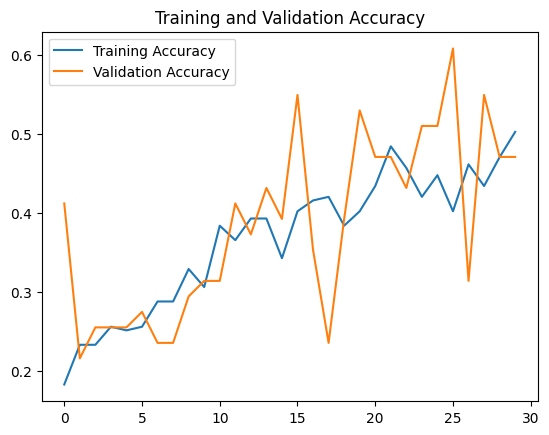

In [57]:
import matplotlib.pyplot as plt

# Courbe de perte
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Courbe de précision (si surveillée)
if 'accuracy' in history.history:
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()


In [58]:
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.5535 - loss: 1.2802
Validation Loss: 1.276638150215149
Validation Accuracy: 0.5490196347236633


In [60]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Charger une image de test
img_path = r'C:\Users\33658\Downloads\WillSmith1.png'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Prédire la classe
prediction = model.predict(img_array)
class_indices = train_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}
predicted_class = class_names[np.argmax(prediction)]

print(f"Predicted Class: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Class: Sandra Bullock
